# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS
Objective: Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. Dataset: The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.

Part 1: Data Preparation and Exploration 1. Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately. 2. Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies. 3. Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

Part 2: Model Building - ARIMA 1. Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series. 2. Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series. 3. Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies. 4. Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

Part 3: Model Building - Exponential Smoothing 1. Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters). 2. Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components. 3. Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

Part 4: Evaluation and Comparison 1. Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models. 2. Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics. 3. Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

Deliverables: • Include visualizations and explanations for the choices and findings at each step. • Well-commented Python code that used to conduct the analysis and build the models. Assessment Criteria: • Accuracy and completeness of the data preparation and exploration steps. • Justification for model selection and parameter tuning decisions. • Clarity and depth of the analysis in the diagnostics and model evaluation stages. This assignment offers a hands-on experience with real-world data, applying sophisticated time series forecasting methods to predict future currency exchange rates.

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import log
from numpy import sqrt
from pandas import read_csv
from pandas import DataFrame
import statsmodels.api as smfa
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Loading data
data= pd.read_csv('exchange_rate.csv')

In [3]:
# Backup for data
df= data.copy()

# Data Exploration

In [4]:
df.shape

(7588, 2)

In [5]:
df.head(5)

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [6]:
df.tail(5)

,date,Ex_rate
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825
7587,10-10-2010 00:00,0.720825


In [7]:
df.sample()

,date,Ex_rate
662,25-10-1991 00:00,0.7325


### Quick Data Check

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


### Statistical Summary

In [9]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


# Data Preprocessing
### Identifying Duplicates

In [10]:
df.duplicated().sum()

0

In [11]:
#There is no duplicate value in above data set

### Identifyning Missing Values

In [12]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [13]:
# There is no missing value in given data

### Data Visualization

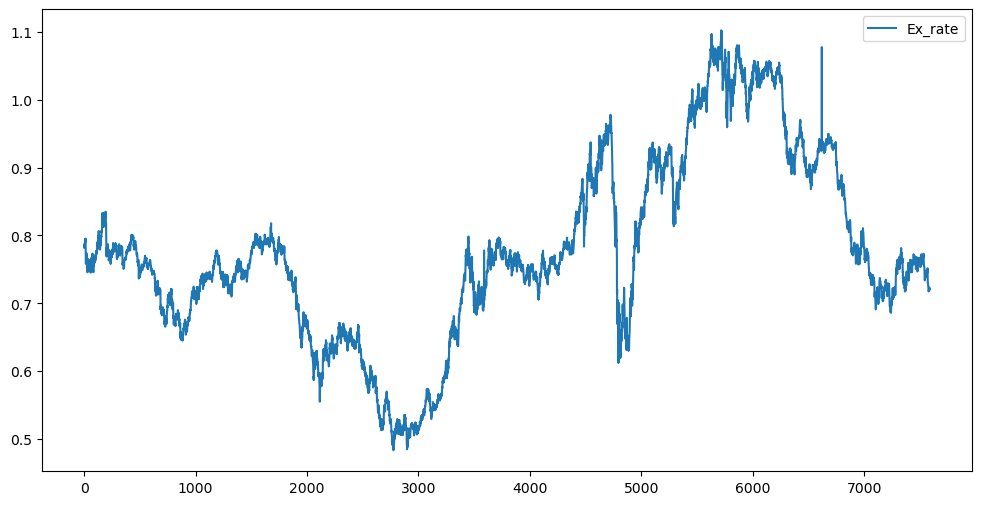

In [14]:
df.plot(figsize=(12,6));

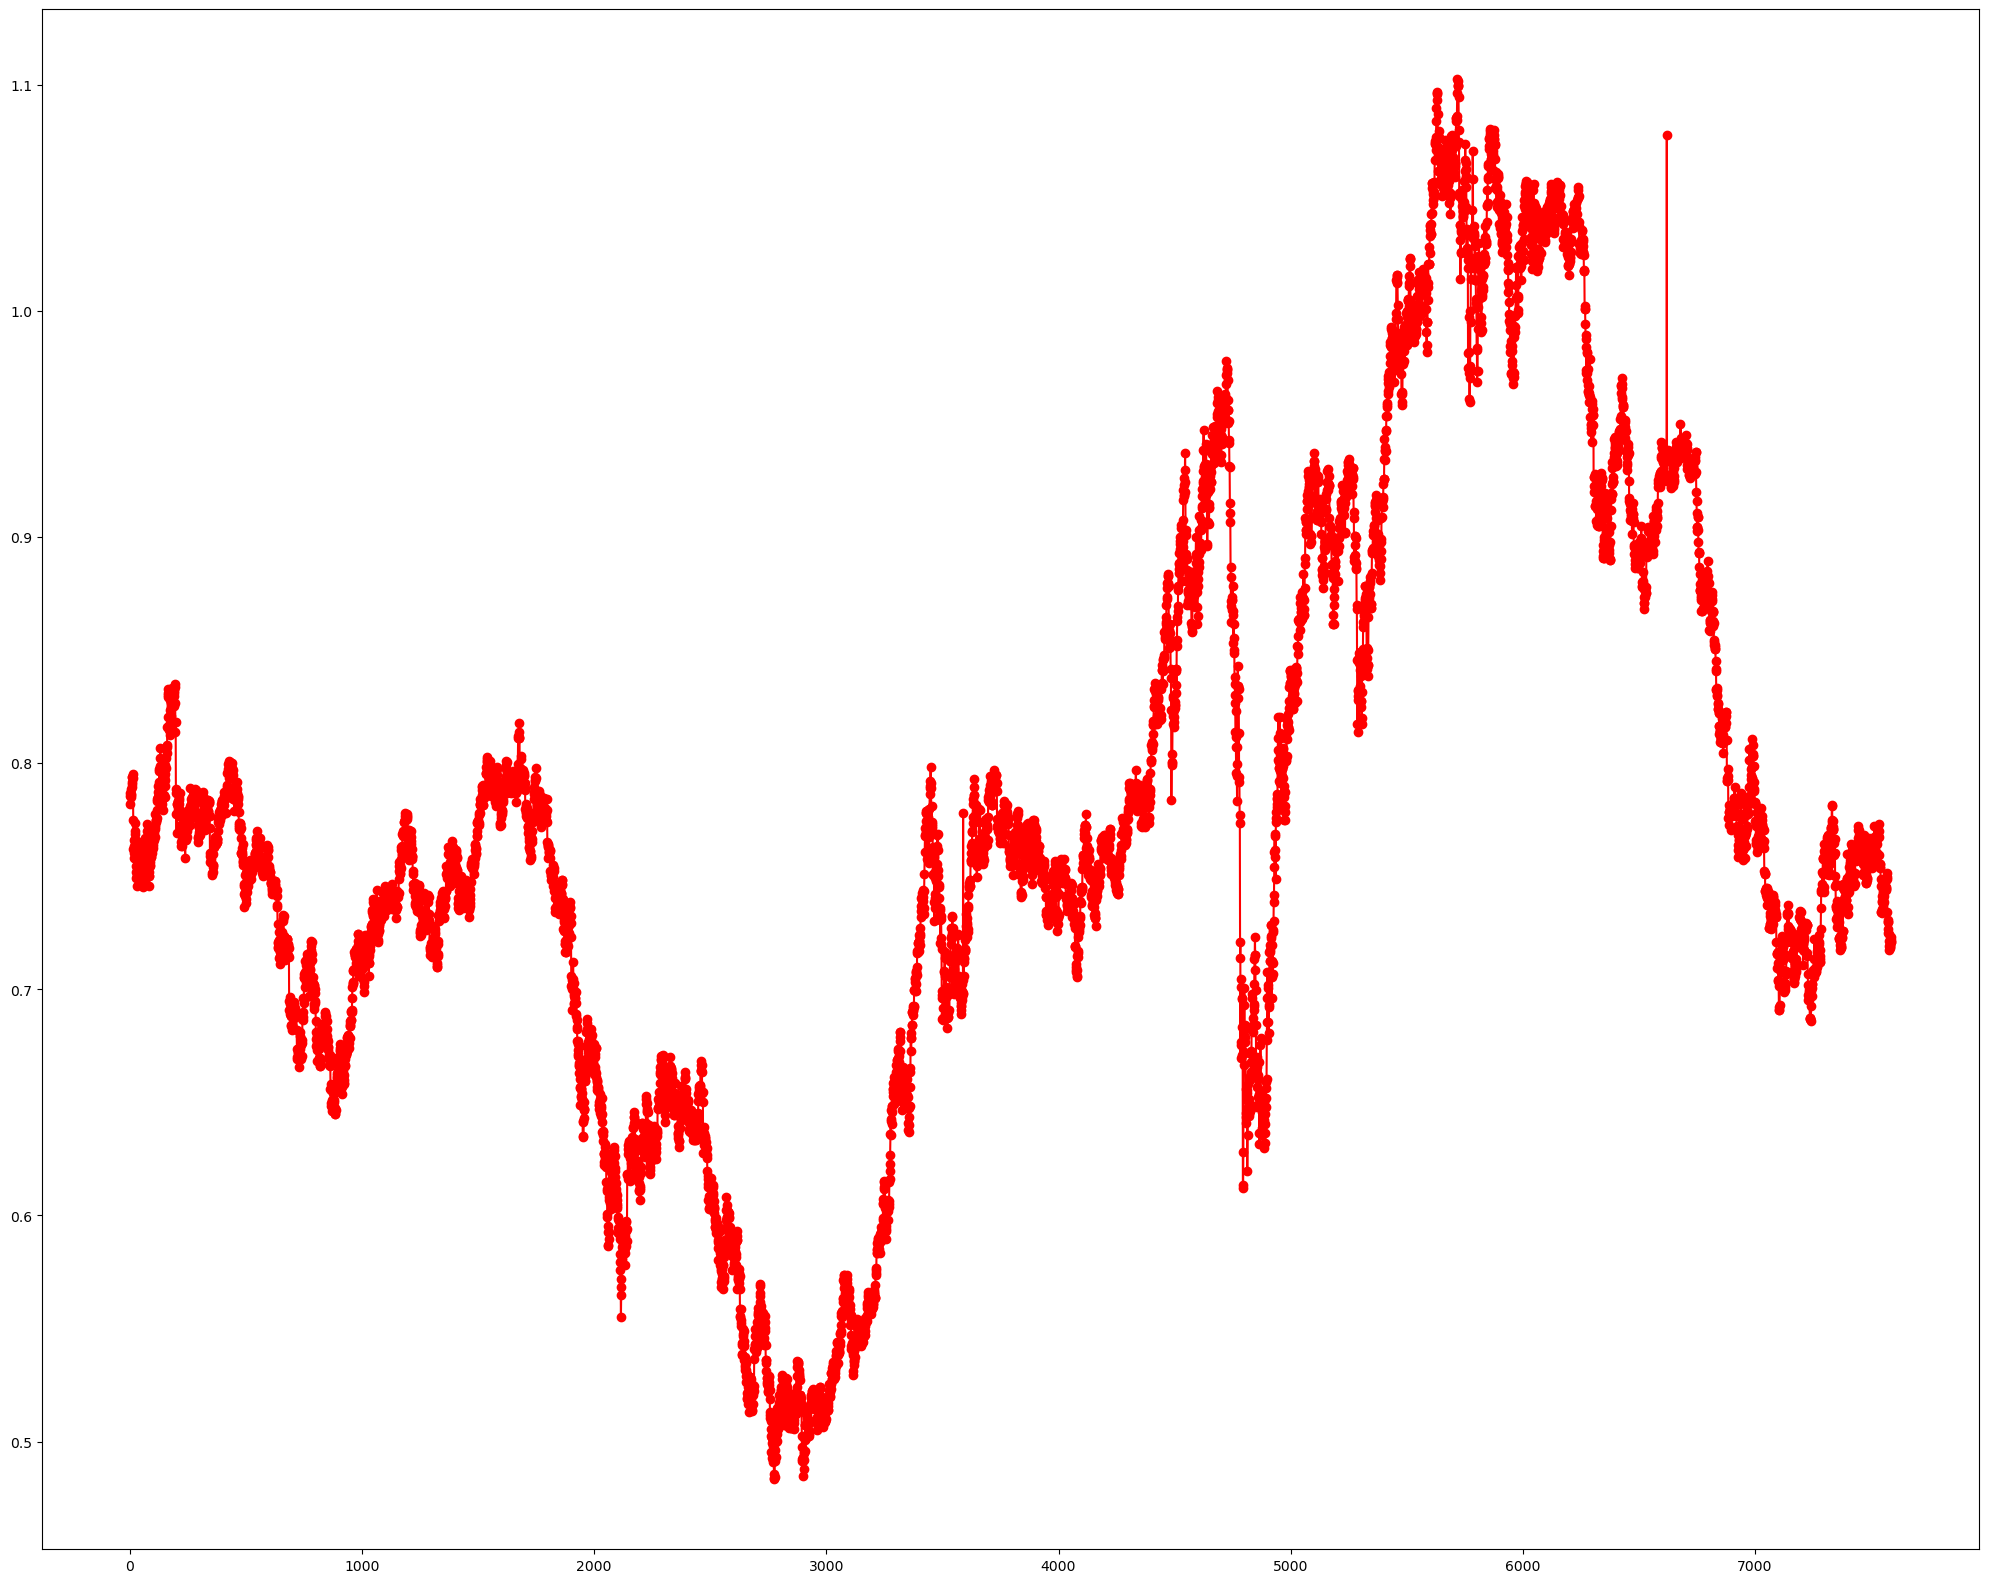

In [15]:
df['Ex_rate'].plot(figsize=(25, 20),color='red',marker='o');

### Histogram and Density Plots

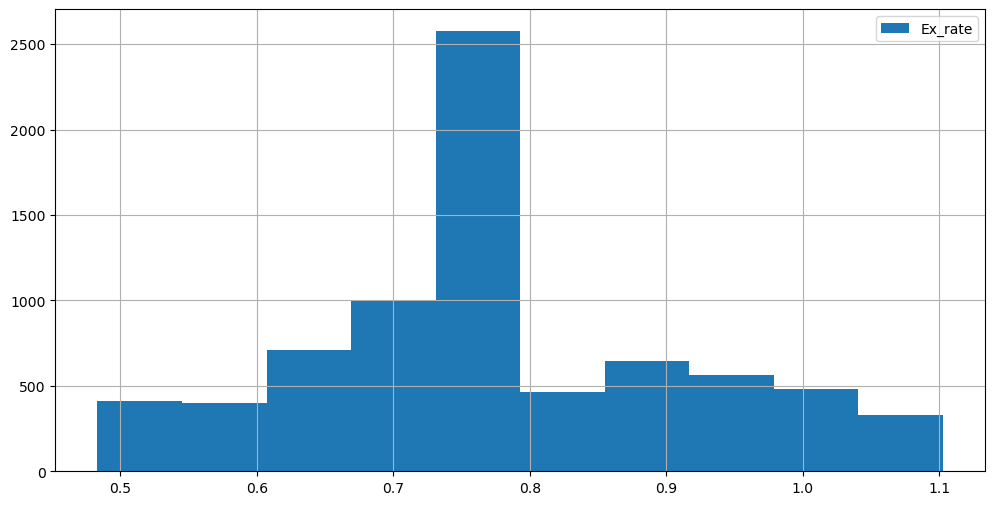

In [16]:
df.Ex_rate.hist(figsize=(12,6),legend=True);

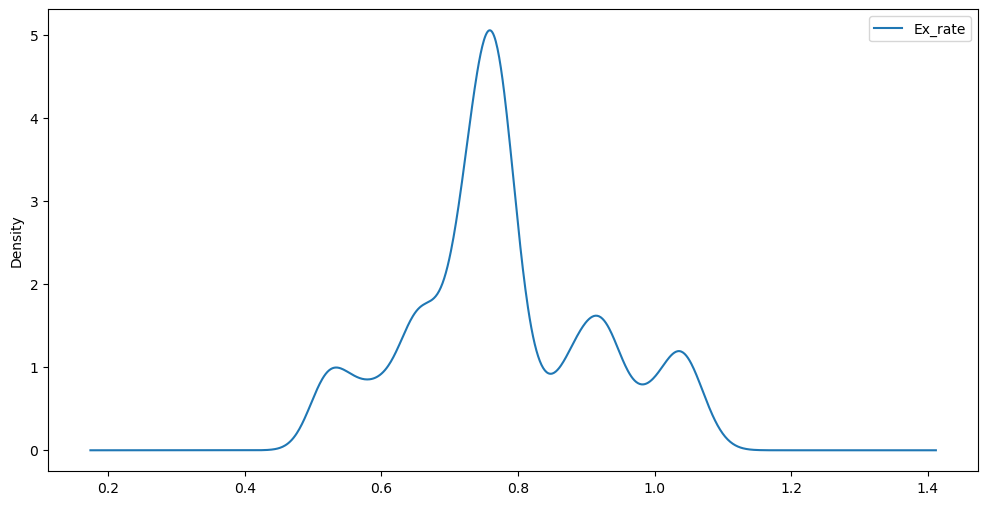

In [17]:
df.Ex_rate.plot(kind='kde',figsize=(12,6),legend=True);

### Simple Moving Average

In [18]:
df['6-month-SMA'] = df['Ex_rate'].rolling(window=6).mean()
df['12-month-SMA'] = df['Ex_rate'].rolling(window=12).mean()

In [19]:
df.head(10)

,date,Ex_rate,6-month-SMA,12-month-SMA
0,01-01-1990 00:00,0.7855,NaN,NaN
1,02-01-1990 00:00,0.7818,NaN,NaN
2,03-01-1990 00:00,0.7867,NaN,NaN
3,04-01-1990 00:00,0.7860,NaN,NaN
4,05-01-1990 00:00,0.7849,NaN,NaN
5,06-01-1990 00:00,0.7866,0.785250,NaN
6,07-01-1990 00:00,0.7886,0.785767,NaN
7,08-01-1990 00:00,0.7910,0.787300,NaN
8,09-01-1990 00:00,0.7939,0.788500,NaN
9,10-01-1990 00:00,0.7894,0.789067,NaN


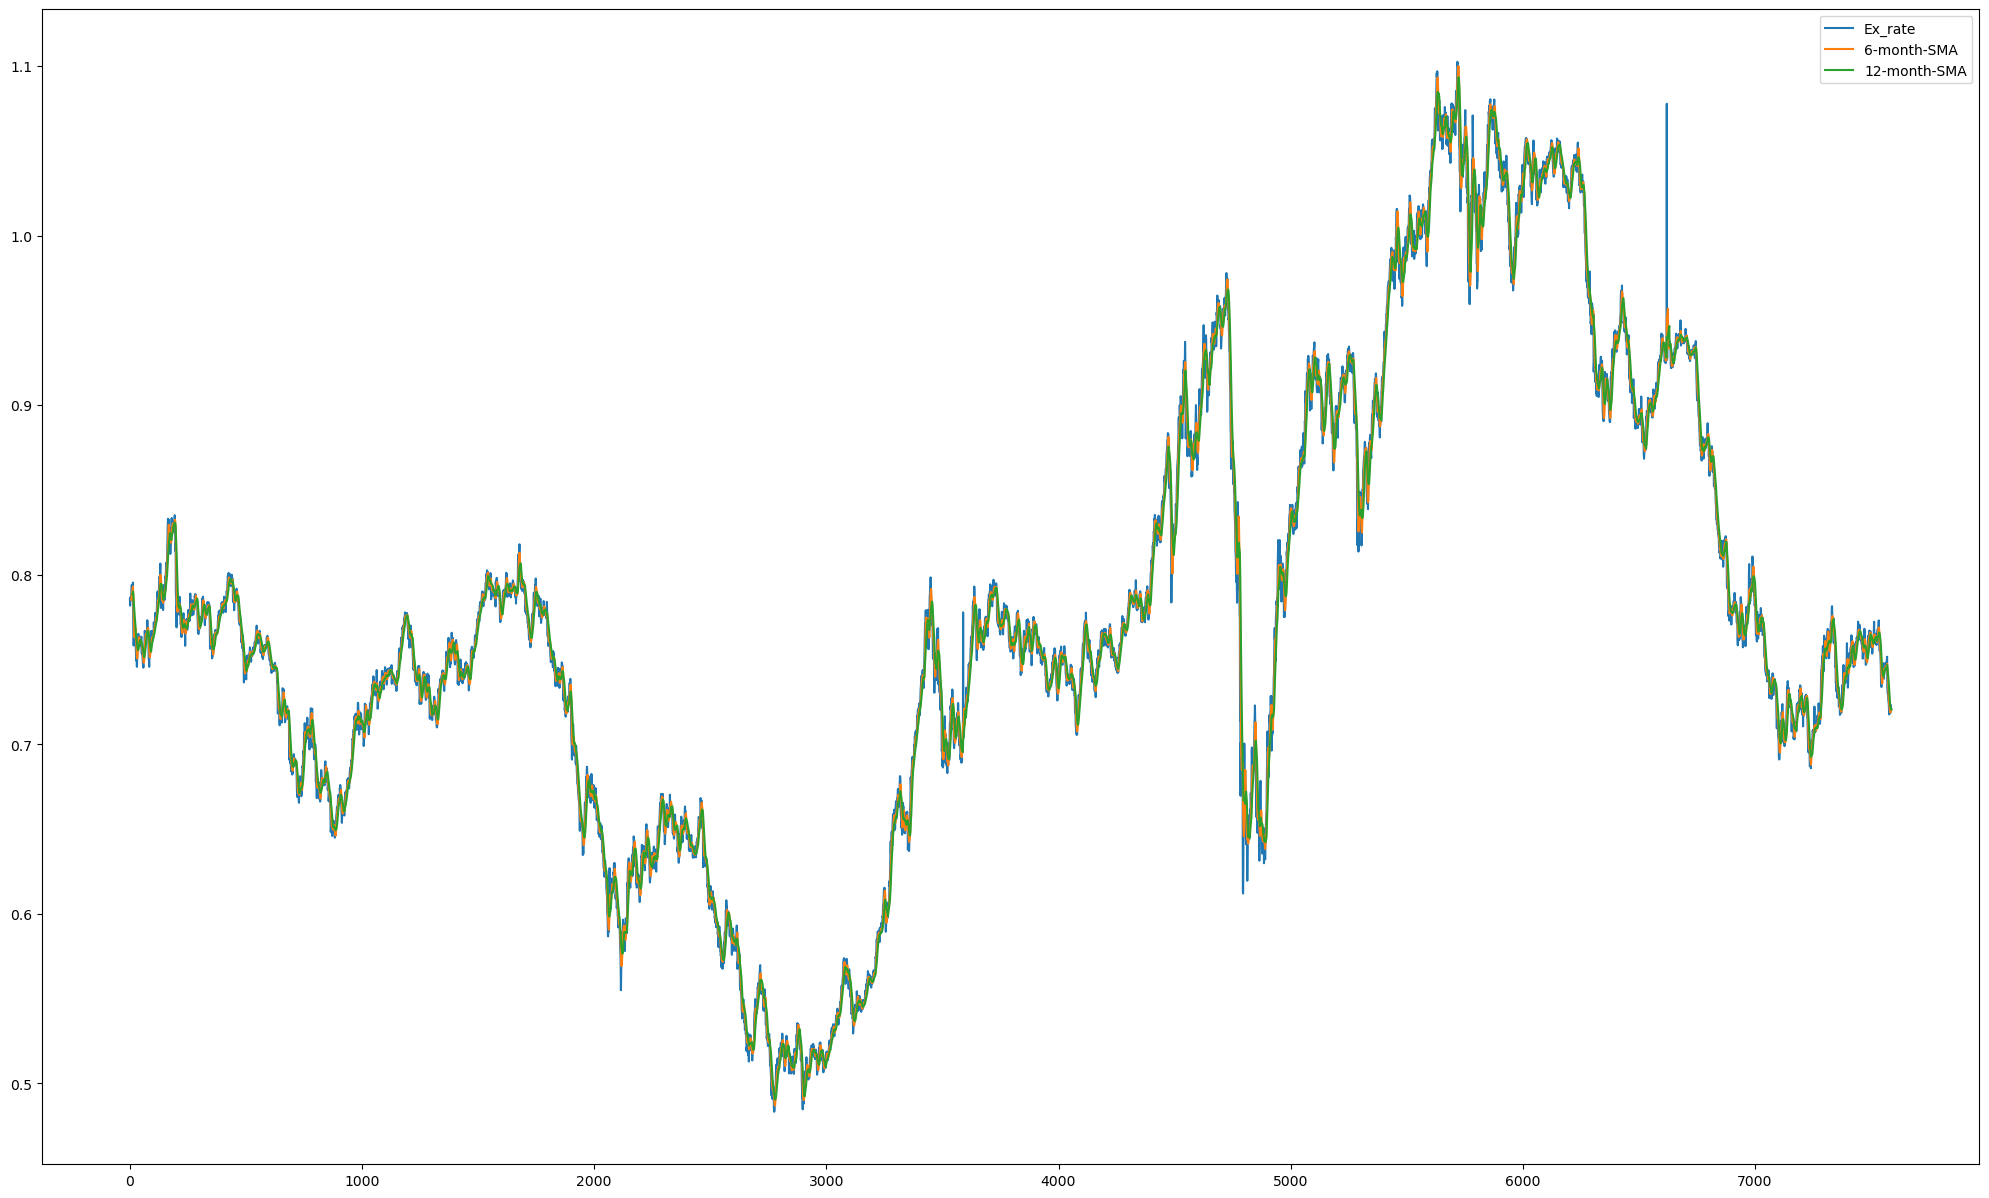

In [20]:
df.plot(figsize=(25,15), legend=True);

### Exponentially Weighted Moving Average

In [21]:
df['EWMA12'] = df['Ex_rate'].ewm(span=12,adjust=False).mean()

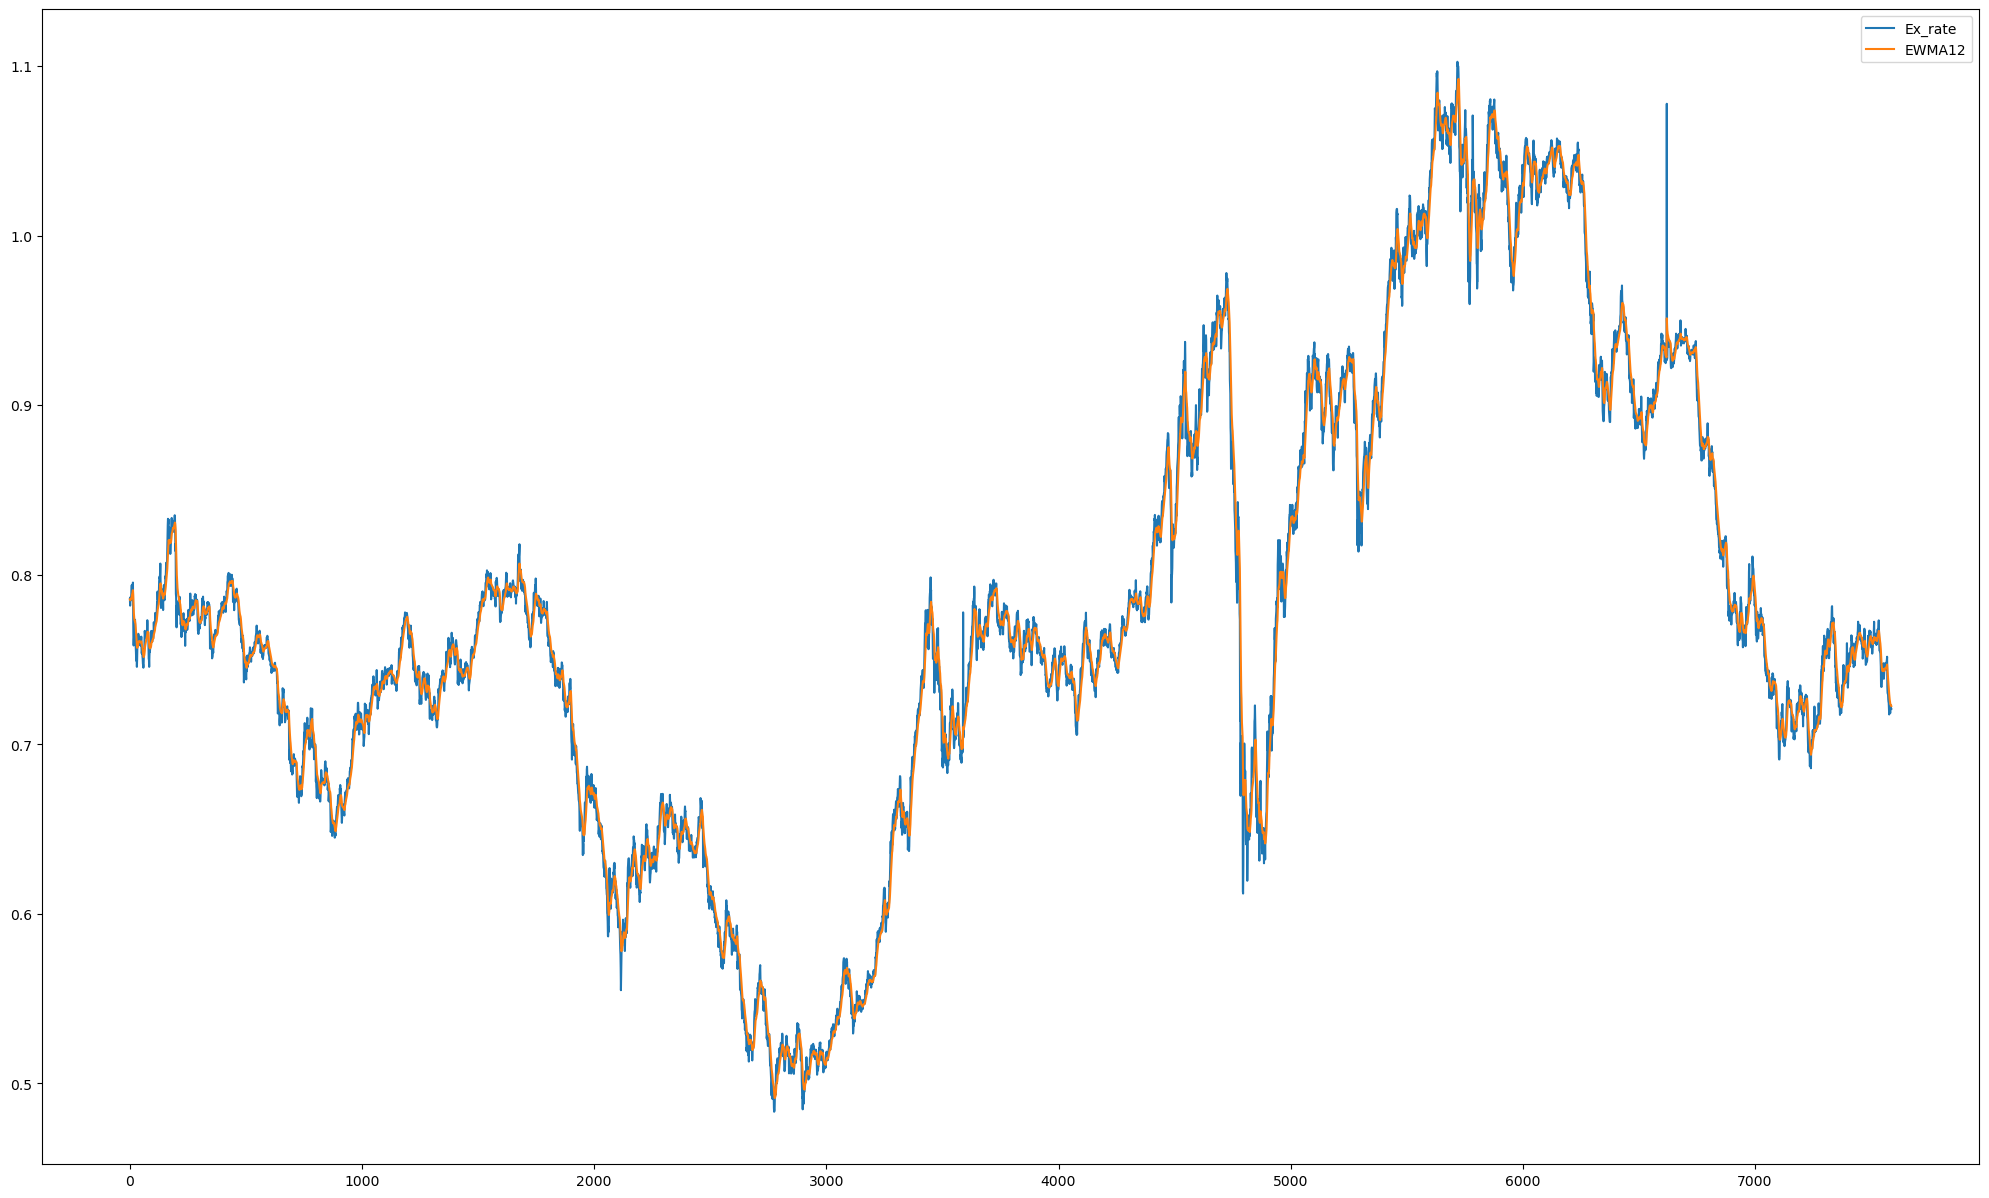

In [22]:
df[['Ex_rate','EWMA12']].plot(figsize=(25,15), legend=True);

### Comparing SMA to EWMA

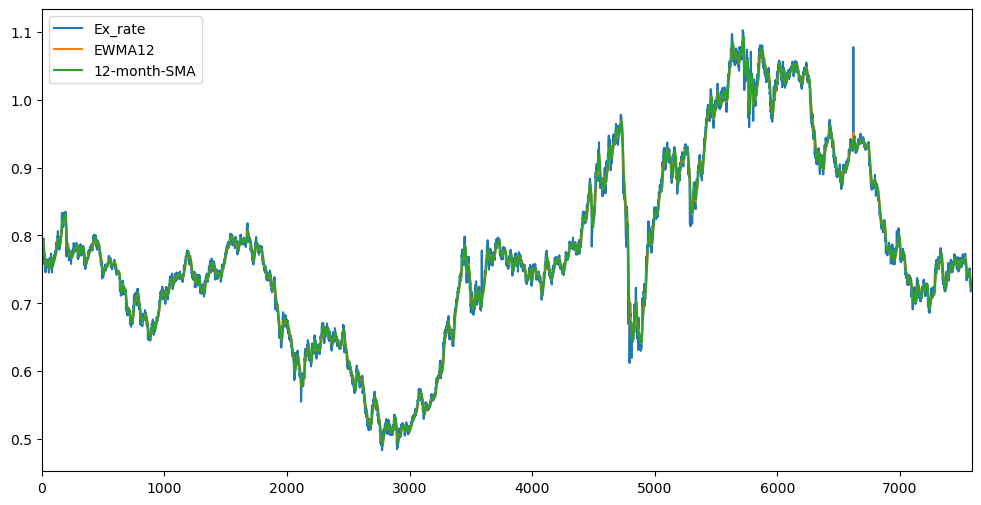

In [23]:
df[['Ex_rate','EWMA12','12-month-SMA']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

# Double Exponential Smoothing
In Double Exponential Smoothing (aka Holt's Method) we introduce a new smoothing factor (beta) that addresses trend:

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Ex_rate'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,date,Ex_rate,6-month-SMA,12-month-SMA,EWMA12,DESadd12
0,01-01-1990 00:00,0.7855,NaN,NaN,0.785500,0.785438
1,02-01-1990 00:00,0.7818,NaN,NaN,0.784931,0.782264
2,03-01-1990 00:00,0.7867,NaN,NaN,0.785203,0.786115
3,04-01-1990 00:00,0.7860,NaN,NaN,0.785326,0.786006
4,05-01-1990 00:00,0.7849,NaN,NaN,0.785260,0.785035


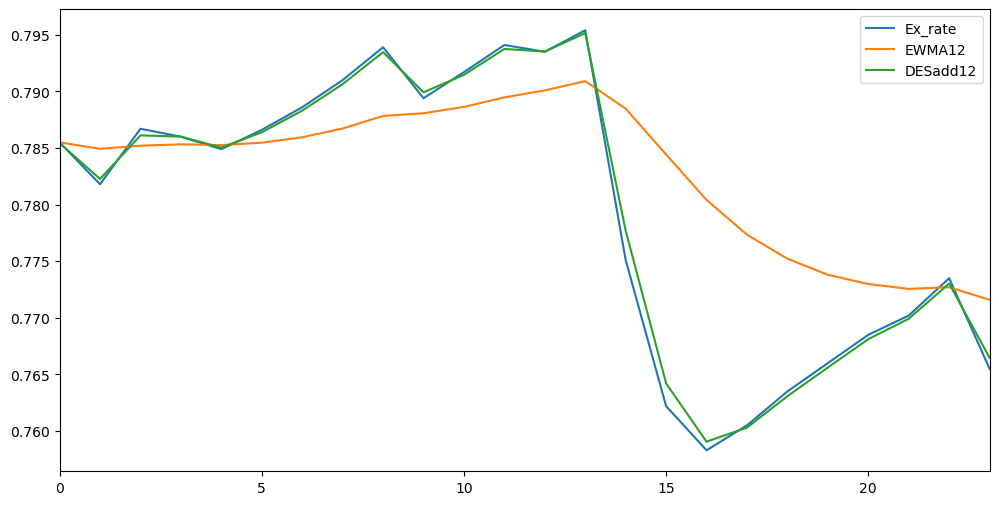

In [25]:
df[['Ex_rate','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.
The DES (green line) appears to track the blue line (actual sales data) more closely than the EWMA (orange line) in recent years.
This is because the DES takes into account not only the level of past data points but also the rate of change of those data points.
This can help the DES to more accurately capture trends in the data, especially when those trends are changing rapidly.
Let's see if using a multiplicative seasonal adjustment helps.

In [26]:
df['DESmul12'] = ExponentialSmoothing(df['Ex_rate'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,date,Ex_rate,6-month-SMA,12-month-SMA,EWMA12,DESadd12,DESmul12
0,01-01-1990 00:00,0.7855,NaN,NaN,0.785500,0.785438,0.785423
1,02-01-1990 00:00,0.7818,NaN,NaN,0.784931,0.782264,0.782247
2,03-01-1990 00:00,0.7867,NaN,NaN,0.785203,0.786115,0.786095
3,04-01-1990 00:00,0.7860,NaN,NaN,0.785326,0.786006,0.785987
4,05-01-1990 00:00,0.7849,NaN,NaN,0.785260,0.785035,0.785016


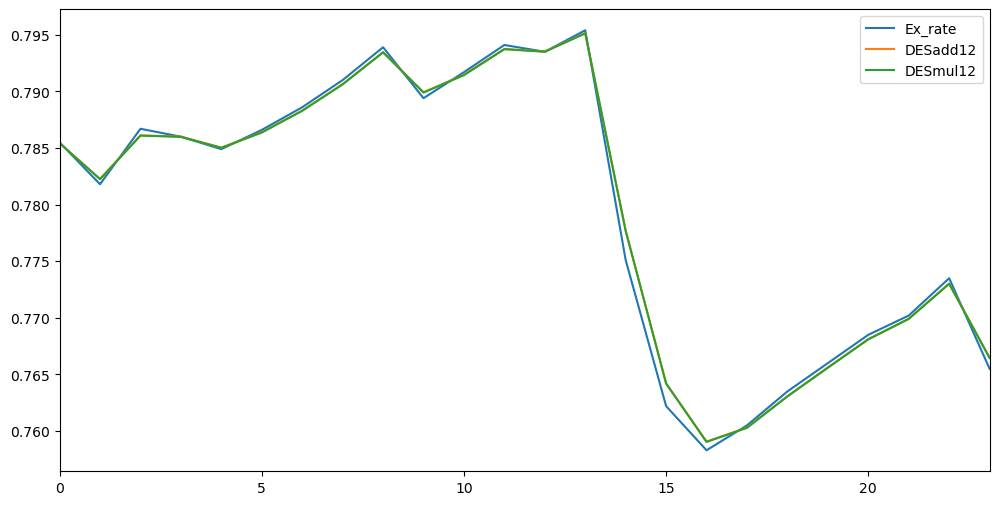

In [27]:
df[['Ex_rate','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### Triple Exponential Smoothing

With Triple Exponential Smoothing (aka the Holt-Winters Method) we introduce a smoothing factor (gamma) that addresses seasonality:

In [28]:
df['TESadd12'] = ExponentialSmoothing(df['Ex_rate'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

,date,Ex_rate,6-month-SMA,12-month-SMA,EWMA12,DESadd12,DESmul12,TESadd12
0,01-01-1990 00:00,0.7855,NaN,NaN,0.785500,0.785438,0.785423,0.785123
1,02-01-1990 00:00,0.7818,NaN,NaN,0.784931,0.782264,0.782247,0.785490
2,03-01-1990 00:00,0.7867,NaN,NaN,0.785203,0.786115,0.786095,0.782258
3,04-01-1990 00:00,0.7860,NaN,NaN,0.785326,0.786006,0.785987,0.786375
4,05-01-1990 00:00,0.7849,NaN,NaN,0.785260,0.785035,0.785016,0.786000


In [29]:
df['TESmul12'] = ExponentialSmoothing(df['Ex_rate'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,date,Ex_rate,6-month-SMA,12-month-SMA,EWMA12,DESadd12,DESmul12,TESadd12,TESmul12
0,01-01-1990 00:00,0.7855,NaN,NaN,0.785500,0.785438,0.785423,0.785123,0.785158
1,02-01-1990 00:00,0.7818,NaN,NaN,0.784931,0.782264,0.782247,0.785490,0.785440
2,03-01-1990 00:00,0.7867,NaN,NaN,0.785203,0.786115,0.786095,0.782258,0.782184
3,04-01-1990 00:00,0.7860,NaN,NaN,0.785326,0.786006,0.785987,0.786375,0.786365
4,05-01-1990 00:00,0.7849,NaN,NaN,0.785260,0.785035,0.785016,0.786000,0.786035


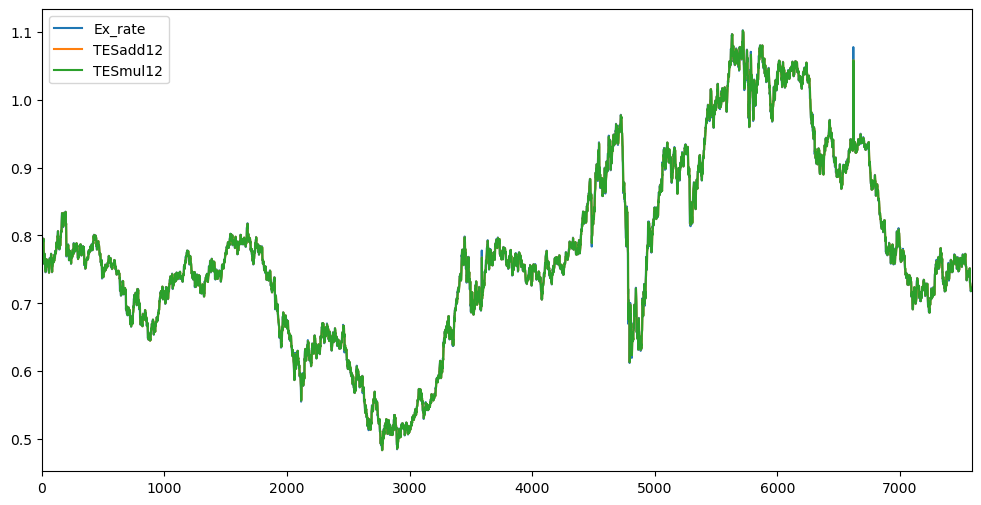

In [30]:
df[['Ex_rate','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

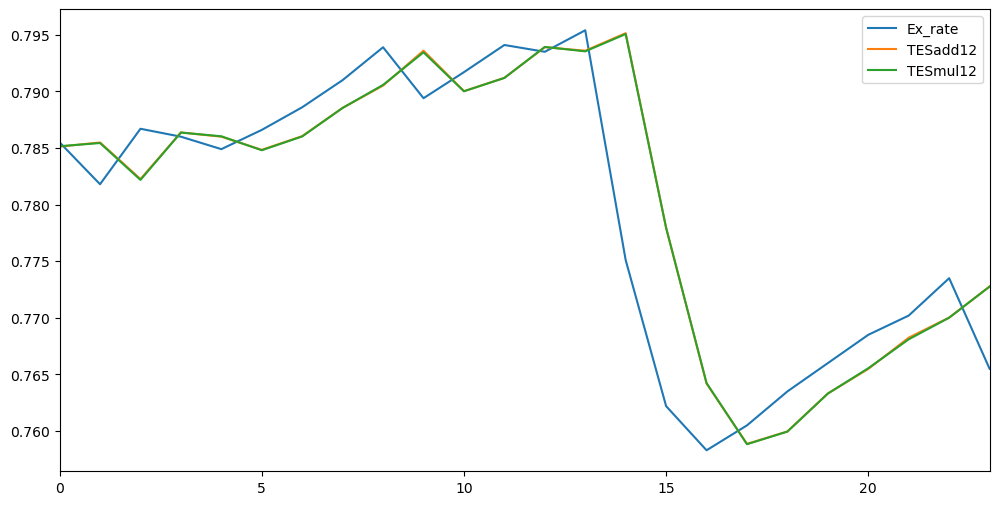

In [31]:
df[['Ex_rate','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

There is a seasonal pattern to the sales data, with sales appearing to be higher in the latter half of each year.
This seasonality is not captured by the triple exponential smoothing model, as both the orange and green lines smooth out the seasonal fluctuations.

# ACF PLot

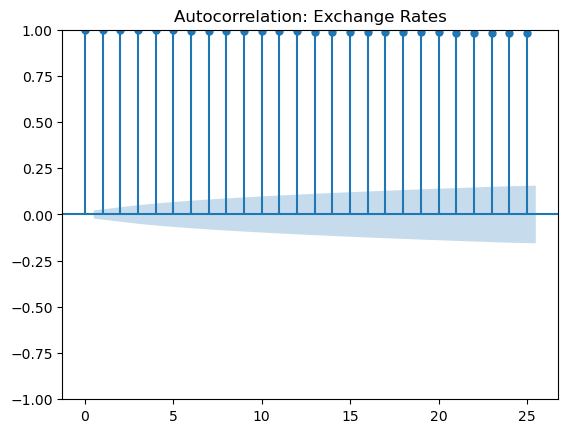

In [32]:
plot_acf(df['Ex_rate'],title = 'Autocorrelation: Exchange Rates', lags=25);

# PACF Plots
Partial autocorrelations work best with stationary data.
To make the Airline Passengers data stationary, we'll first apply differencing

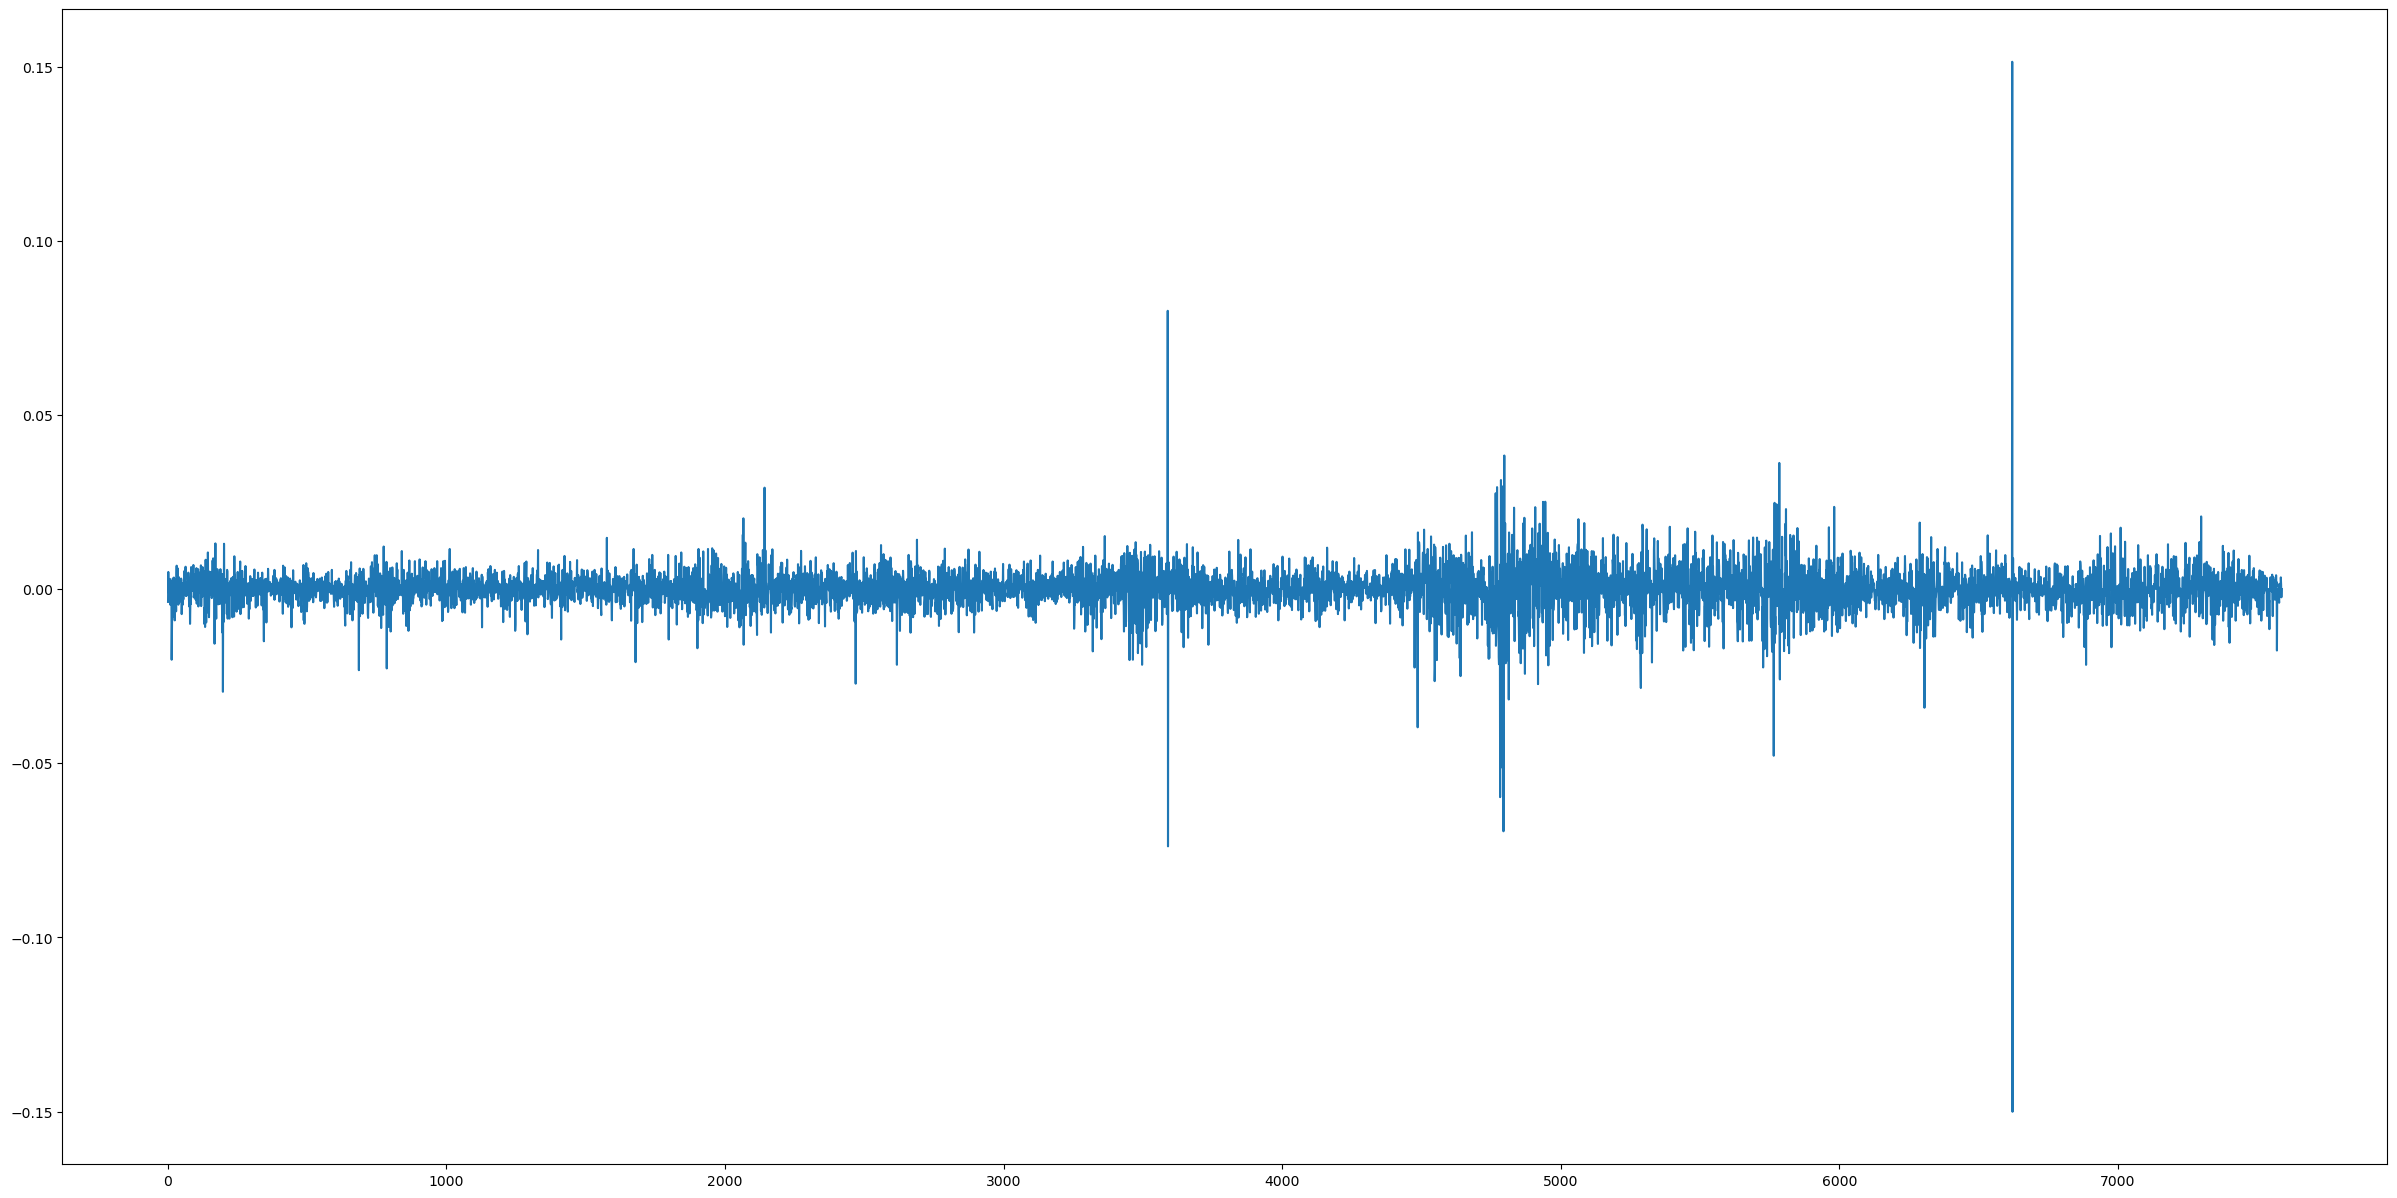

In [33]:
from statsmodels.tsa.statespace.tools import diff

df['d1'] = diff(df['Ex_rate'],k_diff=1)
df['d1'].plot(figsize=(30,15));

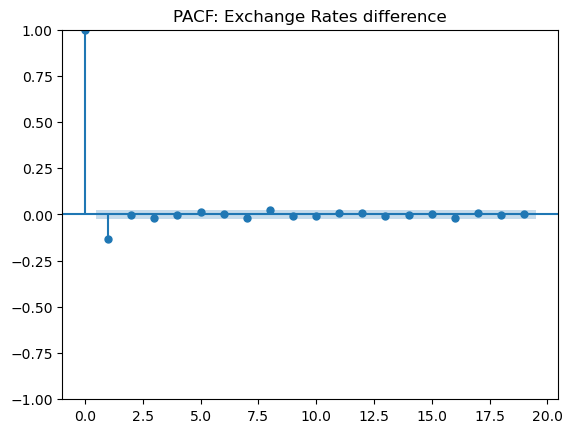

In [34]:
lags=20
plot_pacf(df['d1'].dropna(),title='PACF: Exchange Rates difference', lags=np.arange(lags));

The first lag of the PACF plot is statistically significant, which indicates that there is a strong positive correlation between Coca-Cola sales at a given time and Coca-Cola sales one lag period earlier. This means that Coca-Cola sales tend to be similar from one period to the next. The remaining lags of the PACF plot are not statistically significant which suggests that there is no significant autocorrelation at lags greater than 1. This means that Coca-Cola sales are not significantly dependent on sales from more than one period in the past, after removing the effects of dependence at shorter lags.

# Tests for Stationarity
### Augmented Dickey-Fuller Test

In [35]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [36]:
adf_test(df['Ex_rate'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.664994
p-value                    0.449233
# lags used                1.000000
# observations          7586.000000
critical value (1%)       -3.431212
critical value (5%)       -2.861921
critical value (10%)      -2.566973
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [37]:
pip install --upgrade statsmodels


Note: you may need to restart the kernel to use updated packages.


# Automatic ARIMA model fitting

In [38]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [39]:
from pmdarima import auto_arima

# Data Splitting

In [42]:
df1 = df[['Ex_rate']]

In [43]:
len(df1)

7588

In [44]:
# Set one year for testing
train = df1.iloc[:30]
test = df1.iloc[30:]

In [45]:
print("Shape of train: ",train.shape)
print("Shape of test: ", test.shape)

Shape of train:  (30, 1)
Shape of test:  (7558, 1)


# Model Selection

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
model = SARIMAX(train['Ex_rate'],order=(0, 1, 0),seasonal_order=(0, 1, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Ex_rate   No. Observations:                   30
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                  55.220
Date:                            Sat, 08 Jun 2024   AIC                           -108.439
Time:                                    23:28:38   BIC                           -107.606
Sample:                                         0   HQIC                          -108.357
                                             - 30                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.823e-05   2.41e-05      3.656      0.000    4.09e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.72   Prob(JB):                         0.39
Heteroskedasticity (H):               0.64   Skew:                            -0.69
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Model Evaluation

In [56]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Ex_rate'], predictions)
print(f'SARIMA(0,1,0)(0,1,0,12) MSE Error: {error:11.10}')

SARIMA(0,1,0)(0,1,0,12) MSE Error: 9.661152493


In [57]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Ex_rate'], predictions)
print(f'SARIMA(0,1,0)(0,1,0,12) RMSE Error: {error:11.10}')

SARIMA(0,1,0)(0,1,0,12) RMSE Error: 3.108239452


# Retrain the model on the full data, and forecast the future

In [58]:
model = SARIMAX(df1['Ex_rate'],order=(0,1,0),seasonal_order=(0,1,0,12))

results = model.fit()

fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(0,1,0)(0,1,0,12) Forecast')

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


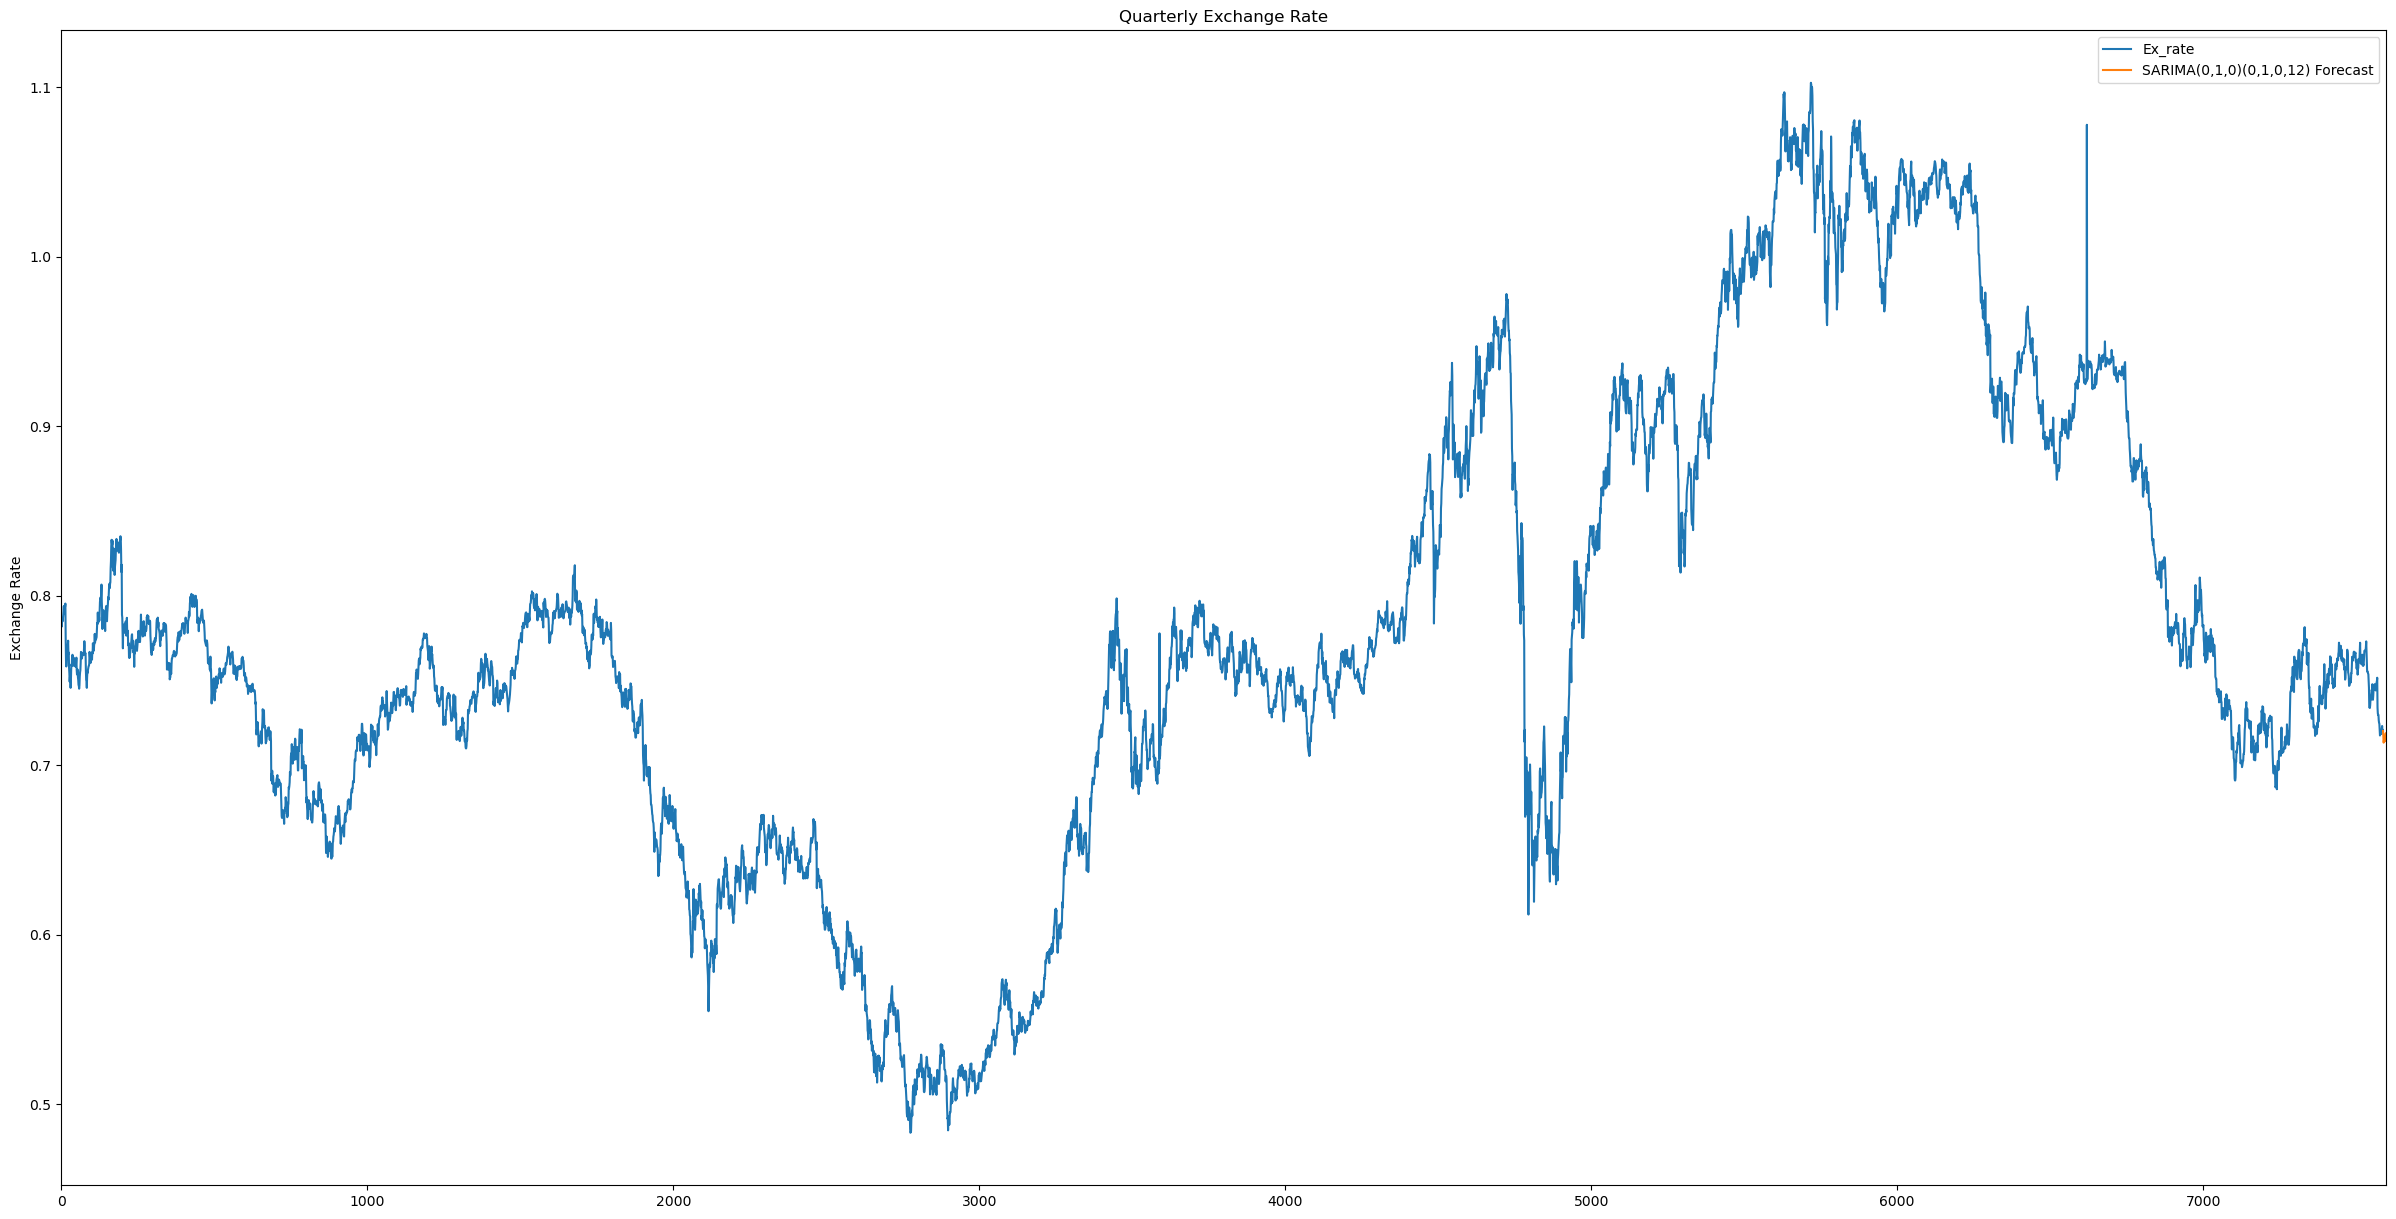

In [61]:
# Plot predictions against known values
title = 'Quarterly Exchange Rate'
ylabel='Exchange Rate'
xlabel=''

ax = df1['Ex_rate'].plot(legend=True,figsize=(30,15),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# Forecasting Using Facebook Prophet

In [63]:
pip install prophet


     -------------------------------------- 13.3/13.3 MB 387.0 kB/s eta 0:00:00
     -------------------------------------- 94.4/94.4 kB 597.2 kB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 564.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [64]:
from prophet import Prophet

In [65]:
df=pd.read_csv('exchange_rate.csv')

In [66]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


### Format The Data

In [86]:
# df.columns = ['ds','y']

new_names = {'Ex_rate': 'y', 'date': 'ds'}
df = df.rename(columns=new_names)

df = df[['ds', 'y']]


In [87]:
df.head()

,ds,y
0,1990-01-01,0.7855
1,1990-02-01,0.7818
2,1990-03-01,0.7867
3,1990-04-01,0.7860
4,1990-05-01,0.7849


In [88]:
df['ds'] = pd.to_datetime(df['ds'])

<Axes: xlabel='ds'>

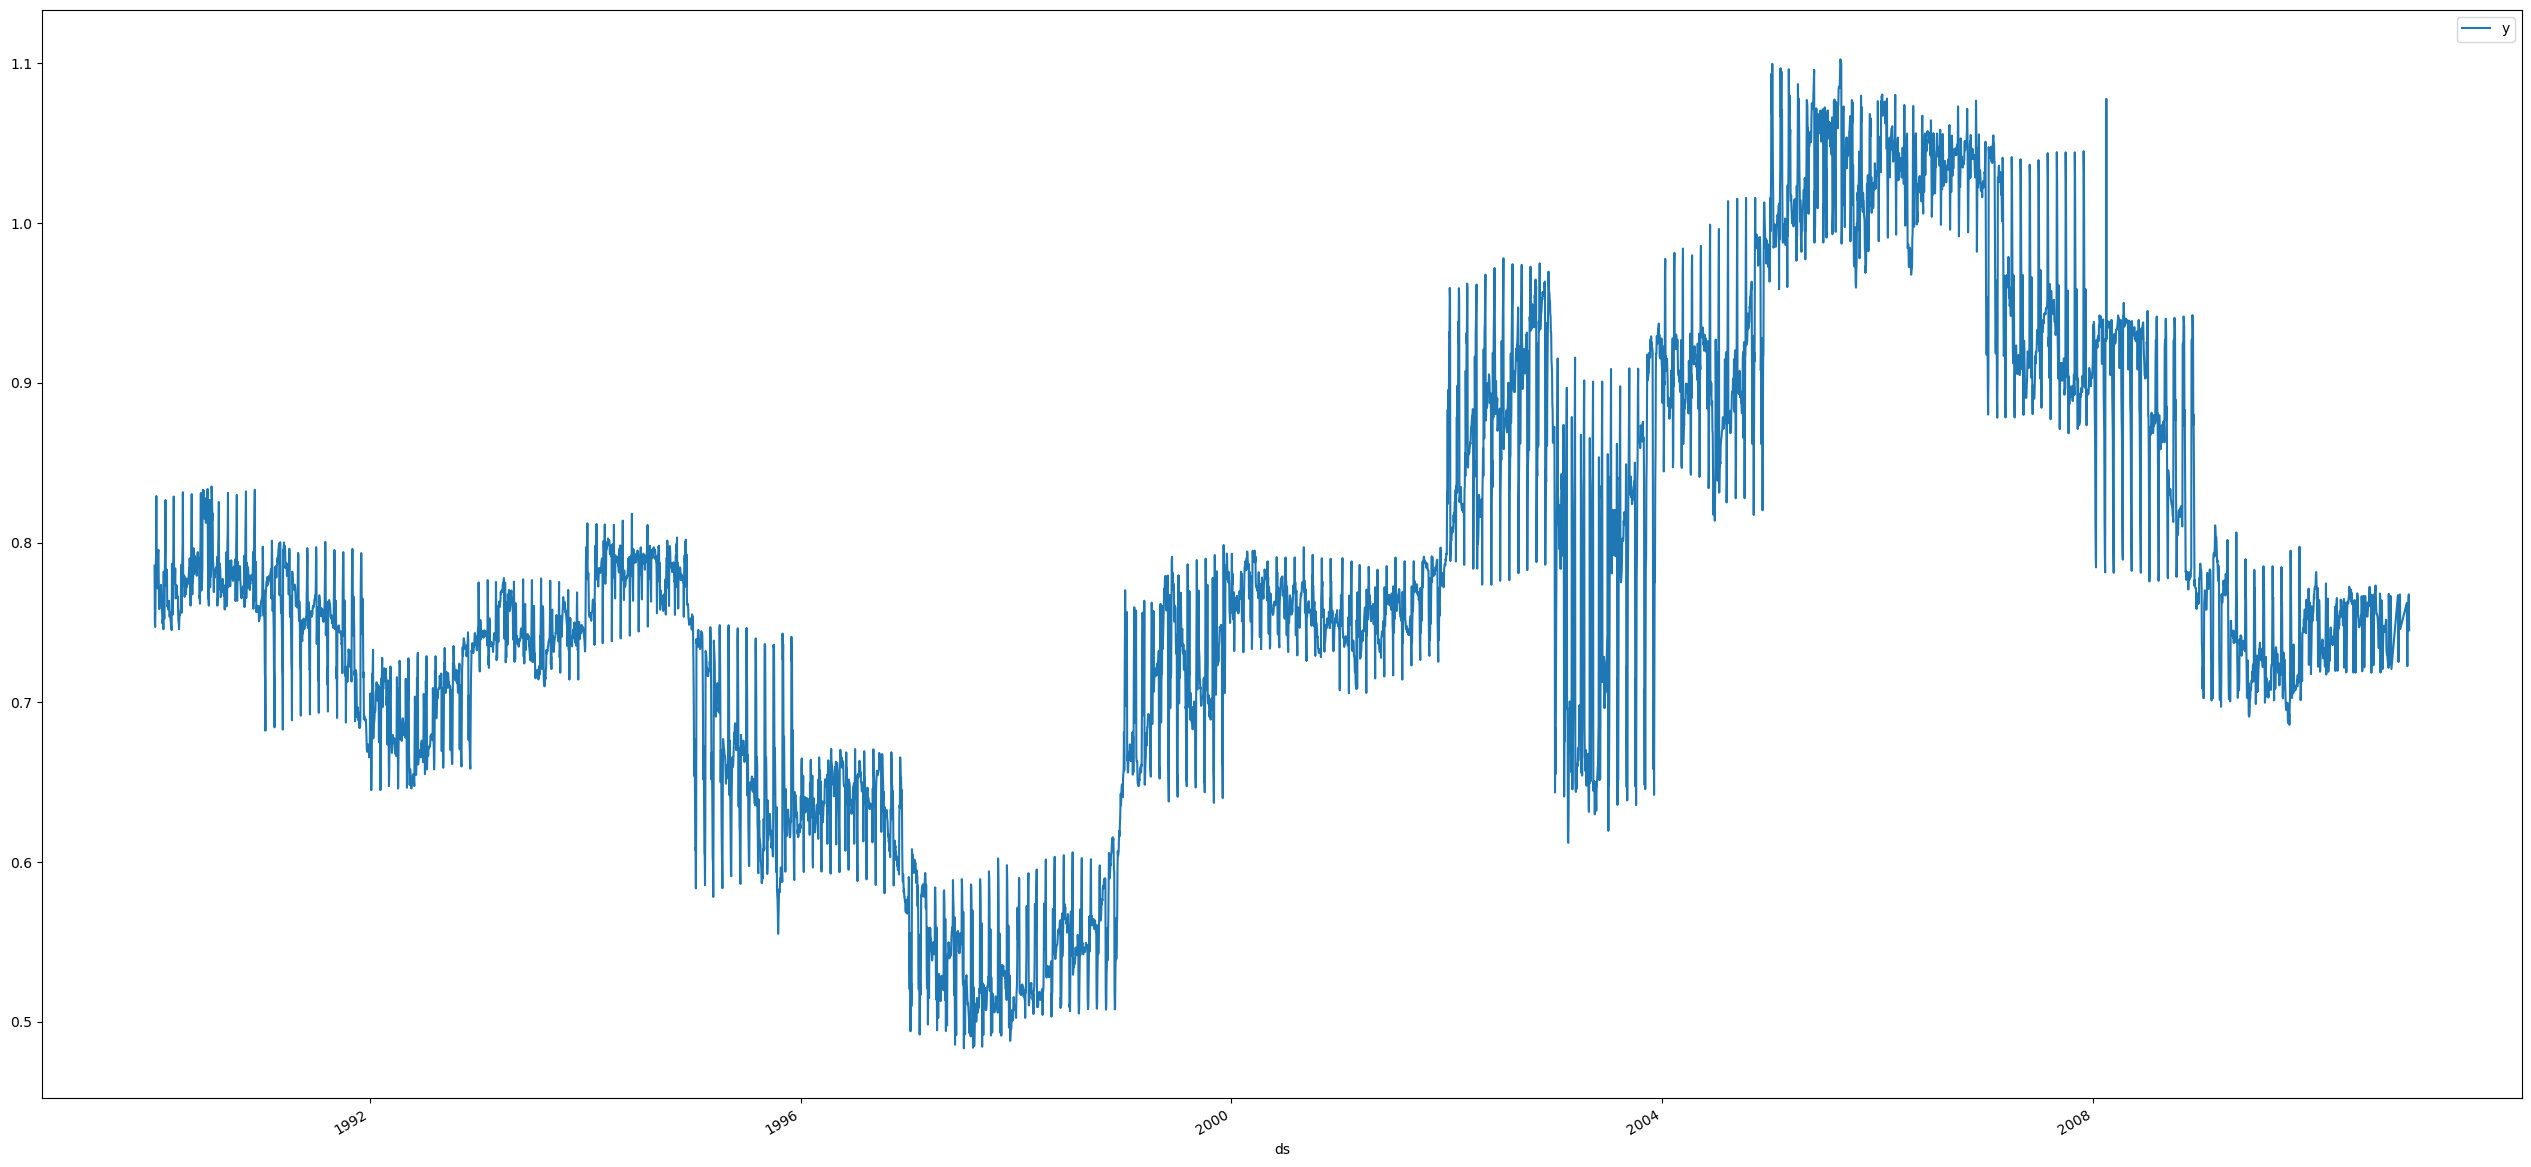

In [89]:
df.plot(x='ds',y='y',figsize=(32,16))

In [90]:
train = df.iloc[:30]
test = df.iloc[30:]

### Create and Fit Model

In [91]:
m = Prophet()
m.fit(train)

23:53:35 - cmdstanpy - INFO - Chain [1] start processing
23:53:36 - cmdstanpy - INFO - Chain [1] done processing


### Create "future" placeholder dataframe

In [93]:
future = m.make_future_dataframe(periods=12,freq = 'Q')

### Predict and fill in the Future


In [94]:
forecast = m.predict(future)

In [95]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,0.766261,0.753789,0.782343,0.766261,0.766261,0.001824,0.001824,0.001824,0.001824,0.001824,0.001824,0.0,0.0,0.0,0.768085
1,1990-01-13,0.767613,0.755495,0.783430,0.767613,0.767613,0.002590,0.002590,0.002590,0.002590,0.002590,0.002590,0.0,0.0,0.0,0.770203
2,1990-01-14,0.767726,0.756686,0.785735,0.767726,0.767726,0.003958,0.003958,0.003958,0.003958,0.003958,0.003958,0.0,0.0,0.0,0.771684
3,1990-01-15,0.767839,0.755634,0.783866,0.767839,0.767839,0.001824,0.001824,0.001824,0.001824,0.001824,0.001824,0.0,0.0,0.0,0.769663
4,1990-01-16,0.767951,0.750545,0.778936,0.767951,0.767951,-0.003461,-0.003461,-0.003461,-0.003461,-0.003461,-0.003461,0.0,0.0,0.0,0.764491


In [96]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
37,1992-09-30,0.833262,0.814848,0.845627,0.827280,0.838940,-0.003204,-0.003204,-0.003204,-0.003204,-0.003204,-0.003204,0.0,0.0,0.0,0.830058
38,1992-12-31,0.838585,0.825708,0.856752,0.831253,0.845467,0.002873,0.002873,0.002873,0.002873,0.002873,0.002873,0.0,0.0,0.0,0.841458
39,1993-03-31,0.843793,0.823464,0.856508,0.835432,0.851821,-0.003204,-0.003204,-0.003204,-0.003204,-0.003204,-0.003204,0.0,0.0,0.0,0.840588
40,1993-06-30,0.849058,0.828777,0.861772,0.839546,0.858387,-0.003204,-0.003204,-0.003204,-0.003204,-0.003204,-0.003204,0.0,0.0,0.0,0.845854
41,1993-09-30,0.854381,0.838555,0.874772,0.843475,0.864907,0.002873,0.002873,0.002873,0.002873,0.002873,0.002873,0.0,0.0,0.0,0.857254


In [97]:
test.tail()

,ds,y
7583,2010-06-10,0.718494
7584,2010-07-10,0.721839
7585,2010-08-10,0.723197
7586,2010-09-10,0.720825
7587,2010-10-10,0.720825


In [99]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [100]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
30,1990-12-31,0.798113,0.782783,0.812187
31,1991-03-31,0.805454,0.792574,0.819001
32,1991-06-30,0.810719,0.796250,0.824651
33,1991-09-30,0.813909,0.799129,0.829094
34,1991-12-31,0.813947,0.799672,0.828232
35,1992-03-31,0.819213,0.804870,0.834807
36,1992-06-30,0.824478,0.809396,0.839319
37,1992-09-30,0.830058,0.814848,0.845627
38,1992-12-31,0.841458,0.825708,0.856752
39,1993-03-31,0.840588,0.823464,0.856508


# Plotting Forecast

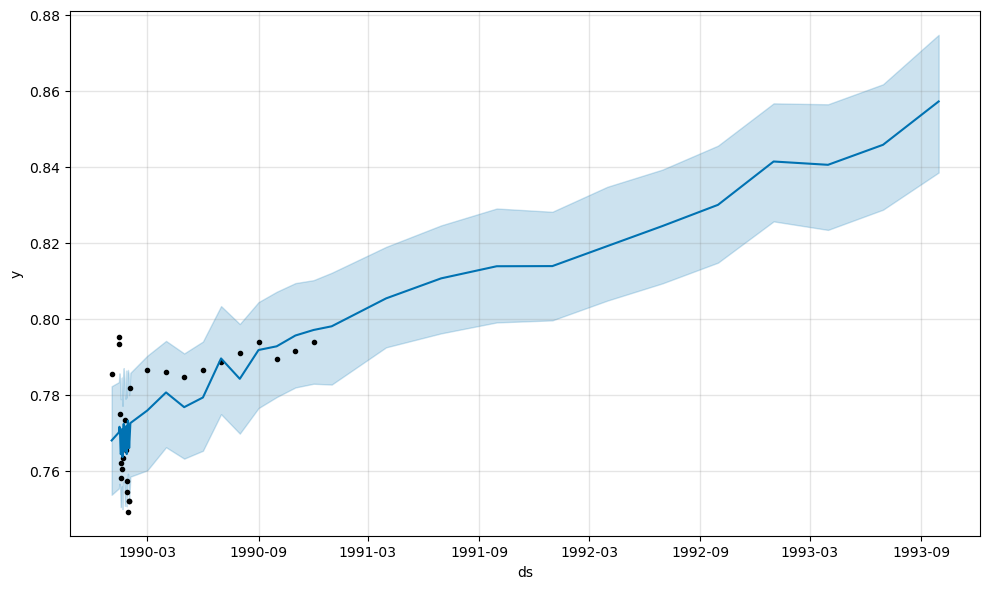

In [101]:
m.plot(forecast);

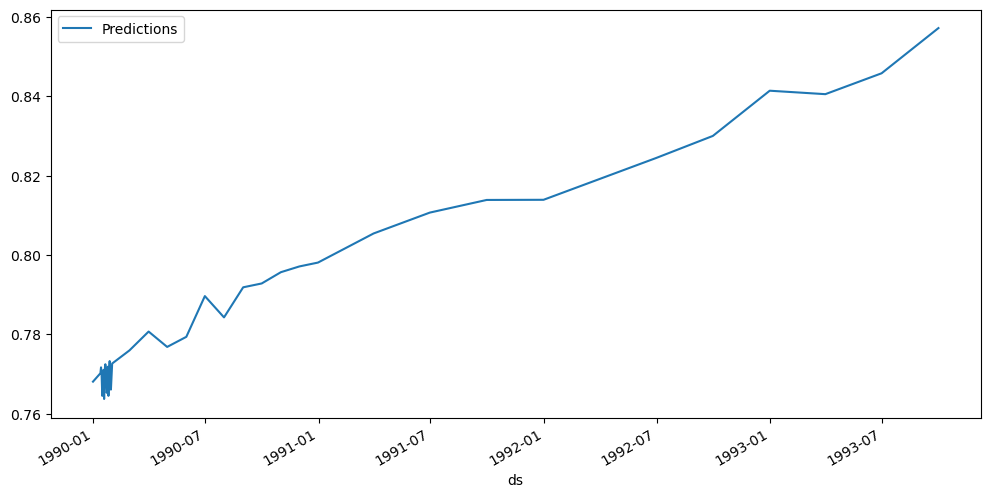

In [102]:
ax = forecast.plot(x='ds', y='yhat', label = 'Predictions', figsize=(12,6))

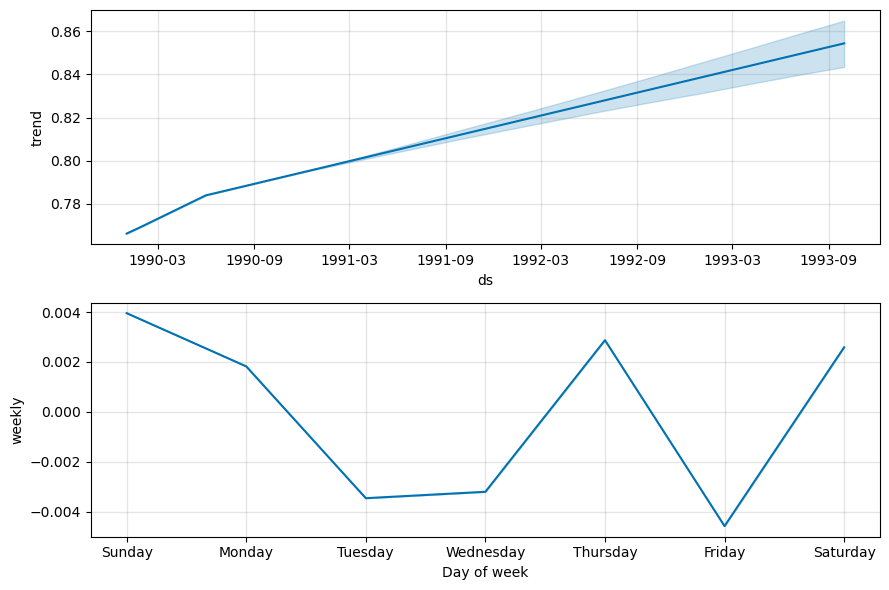

In [103]:
m.plot_components(forecast);

# Model Evaluation

In [104]:
from statsmodels.tools.eval_measures import rmse

In [106]:
predictions = forecast.iloc[-12:]['yhat']

In [107]:
predictions

30    0.798113
31    0.805454
32    0.810719
33    0.813909
34    0.813947
35    0.819213
36    0.824478
37    0.830058
38    0.841458
39    0.840588
40    0.845854
41    0.857254
Name: yhat, dtype: float64

In [108]:
test['y']

30      0.745700
31      0.750000
32      0.756700
33      0.759500
34      0.758600
          ...   
7583    0.718494
7584    0.721839
7585    0.723197
7586    0.720825
7587    0.720825
Name: y, Length: 7558, dtype: float64

In [110]:
test.mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11996\1706541227.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test.mean()


y    0.776982
dtype: float64

# Prophet Diagnostics

In [111]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [162]:
#INITIAL
initial = 2 * 30
initial = str(initial) + ' days'

In [163]:
initial

'60 days'

In [164]:
#PERIOD
period = 2 * 30
period = str(period) + ' days'

In [165]:
period

'60 days'

In [174]:
#HORIZON 
horizon = 90
horizon = str(horizon) + ' days'

In [175]:
horizon

'90 days'

In [176]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

  0%|          | 0/4 [00:00<?, ?it/s]

00:12:06 - cmdstanpy - INFO - Chain [1] start processing
00:12:06 - cmdstanpy - INFO - Chain [1] done processing
00:12:07 - cmdstanpy - INFO - Chain [1] start processing
00:12:07 - cmdstanpy - INFO - Chain [1] done processing
00:12:07 - cmdstanpy - INFO - Chain [1] start processing
00:12:08 - cmdstanpy - INFO - Chain [1] done processing
00:12:08 - cmdstanpy - INFO - Chain [1] start processing
00:12:08 - cmdstanpy - INFO - Chain [1] done processing


In [177]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1990-04-01,0.799111,0.787681,0.810177,0.7860,1990-03-06
1,1990-05-01,0.808615,0.793881,0.823280,0.7849,1990-03-06
2,1990-06-01,0.824987,0.804278,0.845801,0.7866,1990-03-06
3,1990-06-01,0.794920,0.782945,0.805741,0.7866,1990-05-05
4,1990-07-01,0.813993,0.801308,0.826472,0.7886,1990-05-05


In [178]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
7,1990-09-01,0.808279,0.794968,0.821846,0.7939,1990-07-04
8,1990-10-01,0.810922,0.795774,0.825282,0.7894,1990-07-04
9,1990-10-01,0.804580,0.791910,0.817425,0.7894,1990-09-02
10,1990-11-01,0.813953,0.801629,0.827243,0.7917,1990-09-02
11,1990-12-01,0.813814,0.799862,0.827517,0.7941,1990-09-02


In [179]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,26 days,0.000172,0.013111,0.013111,0.016680,0.016680,0.016542,0.0
1,27 days,0.000069,0.008320,0.008320,0.010577,0.010577,0.010521,1.0
2,28 days,0.000007,0.002597,0.002597,0.003283,0.003283,0.003277,1.0
3,29 days,0.000230,0.015180,0.015180,0.019230,0.019230,0.019047,0.0
4,56 days,0.000562,0.023715,0.023715,0.030214,0.030214,0.029765,0.0
5,57 days,0.000645,0.025393,0.025393,0.032200,0.032200,0.031690,0.0
6,59 days,0.000207,0.014379,0.014379,0.018112,0.018112,0.017950,0.0
7,60 days,0.000495,0.022253,0.022253,0.028108,0.028108,0.027718,0.0
8,87 days,0.001474,0.038387,0.038387,0.048801,0.048801,0.047638,0.0
9,88 days,0.000525,0.022907,0.022907,0.028960,0.028960,0.028546,0.0


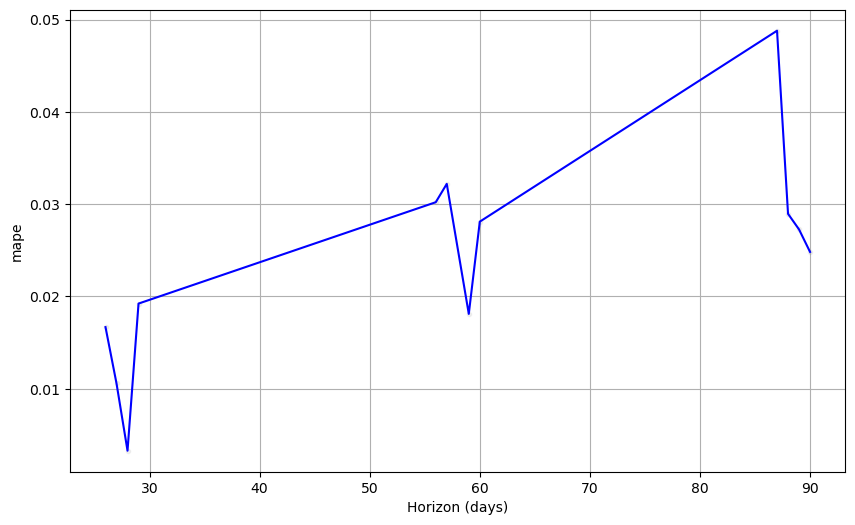

In [180]:
plot_cross_validation_metric(df_cv, metric='mape');

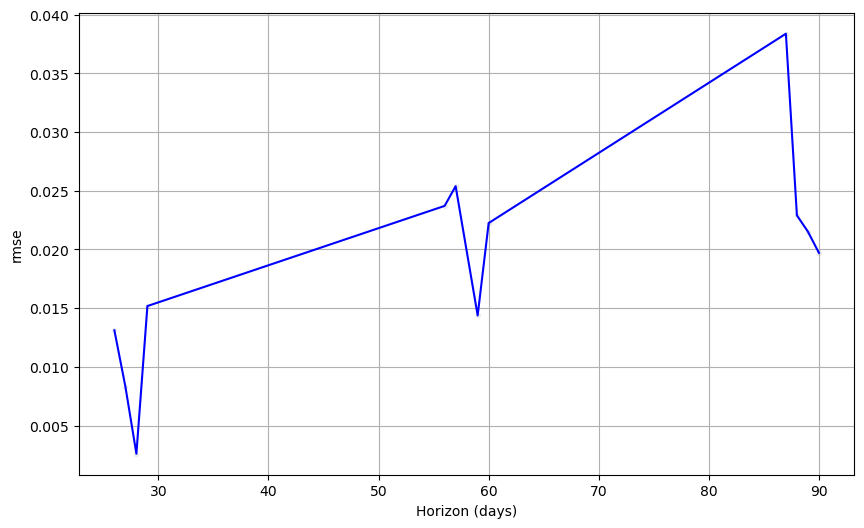

In [181]:
plot_cross_validation_metric(df_cv, metric='rmse');